# Visualization

Trong bài tập này, bạn sẽ được rèn luyện kĩ năng trực quan hóa. Trực quan hóa ngoài việc hỗ  trợ trong khâu tiền xử lí dữ liệu, còn giúp bạn phân tích và rút ra được các thông tin có ý nghĩa từ dữ liệu

**Tập dữ liệu** được sử dụng được lấy từ trang batdongsan.com.vn

In [1]:
#Import các thư viện cần thiết

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')
import random
import math

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
cd D:\ML-homeworks\Hw2\

D:\ML-homeworks\Hw2


In [5]:
#Load dữ liệu từ file
newdf = pd.read_csv("batdongsan.com.vn.csv", dtype = {"month": "string" , "id" : "string"})
print("DONE")

DONE


In [6]:
newdf.columns

Index(['id', 'month', 'project', 'investor', 'square', 'bedrooms', 'bathrooms',
       'direction', 'balcony', 'district', 'ward', 'price'],
      dtype='object')

In [10]:
# Xem 5 hàng dữ liệu đầu tiên, các thông tin ban đầu: df.info(), df.describe(), ...
# Code ở đây:
newdf.info()
display(newdf.head())
newdf.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81163 entries, 0 to 81162
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         81163 non-null  string 
 1   month      81162 non-null  string 
 2   project    78097 non-null  object 
 3   investor   65453 non-null  object 
 4   square     81162 non-null  float64
 5   bedrooms   81162 non-null  float64
 6   bathrooms  81162 non-null  float64
 7   direction  51086 non-null  object 
 8   balcony    54426 non-null  object 
 9   district   81162 non-null  object 
 10  ward       79506 non-null  object 
 11  price      81162 non-null  float64
dtypes: float64(4), object(6), string(2)
memory usage: 7.4+ MB


,id,month,project,investor,square,bedrooms,bathrooms,direction,balcony,district,ward,price
0,28086120,12,Vinhomes Smart City Đại Mỗ,Tập đoàn Vingroup,60.0,3.0,1.0,Đông-Nam,Tây-Bắc,nam tu liem,dai mo,1560.0
1,28088954,12,Goldmark City,Công ty TNHH Thương mại - Quảng cáo - Xây dựng...,121.0,3.0,2.0,NaN,NaN,bac tu liem,phu dien,3300.0
2,28097966,12,Chung cư IEC Tứ Hiệp,NaN,70.0,2.0,2.0,Tây-Bắc,Đông-Nam,thanh tri,tu hiep,1106.0
3,27895887,12,Vinhomes D'Capitale,Tân Hoàng Minh Group,39.0,1.0,1.0,Đông-Nam,Đông-Nam,cau giay,trung hoa,1500.0
4,28056031,12,The Zen Residence,Công ty TNHH Gamuda Land Việt Nam,97.0,3.0,2.0,NaN,NaN,hoang mai,hoang liet,2900.0


(81163, 12)

Đưa ra các câu lệnh để thực hiện các yêu cầu sau:

1. Minh họa boxblot của các trường số như price, bedrooms, square, ...

* Gợi ý: sns.boxplot(data_field)

d:\ANACONDA\Lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)


<Axes: xlabel='price'>

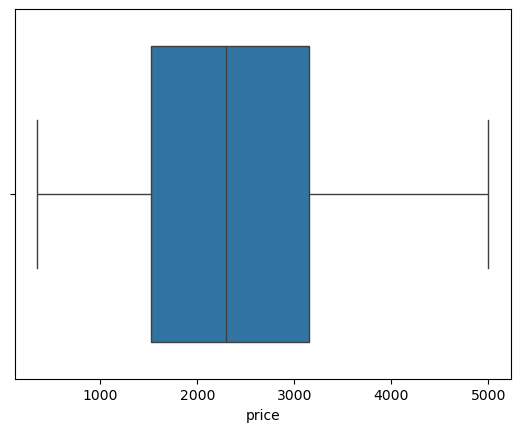

In [12]:
#Code for 'price' field
sns.boxplot(x = newdf['price'])

d:\ANACONDA\Lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)


<Axes: xlabel='square'>

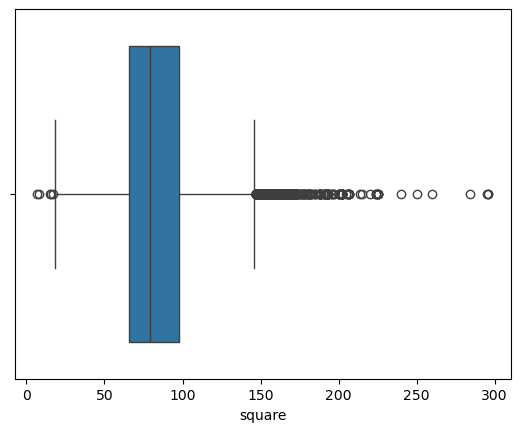

In [14]:
#Code for 'square' field
sns.boxplot(x = newdf['square'])

d:\ANACONDA\Lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)


<Axes: xlabel='bedrooms'>

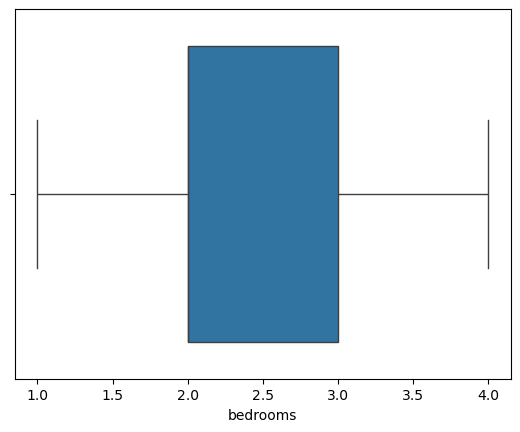

In [15]:
#Code for 'bedrooms' field
sns.boxplot(x = newdf['bedrooms'])

d:\ANACONDA\Lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)


<Axes: xlabel='bathrooms'>

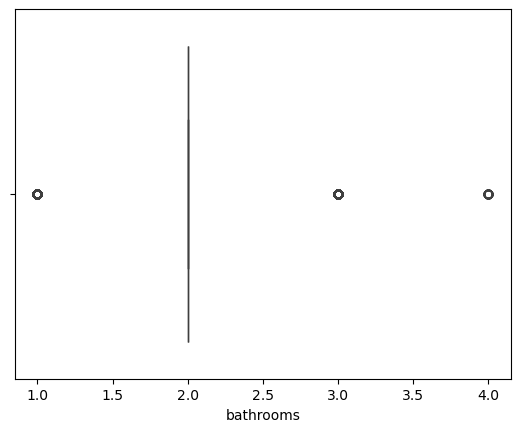

In [16]:
#Code for 'bathrooms' field
sns.boxplot(x = newdf['bathrooms'])

2. Cho đoạn code minh họa Biểu đồ thể hiện số bài đăng theo tháng của năm 2020. Hãy thực hiện các yêu cầu cho các câu hỏi dưới đây:

C:\Users\Admin\AppData\Local\Temp\ipykernel_39436\1920162332.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(df1['month'], rotation=60, horizontalalignment= 'right')


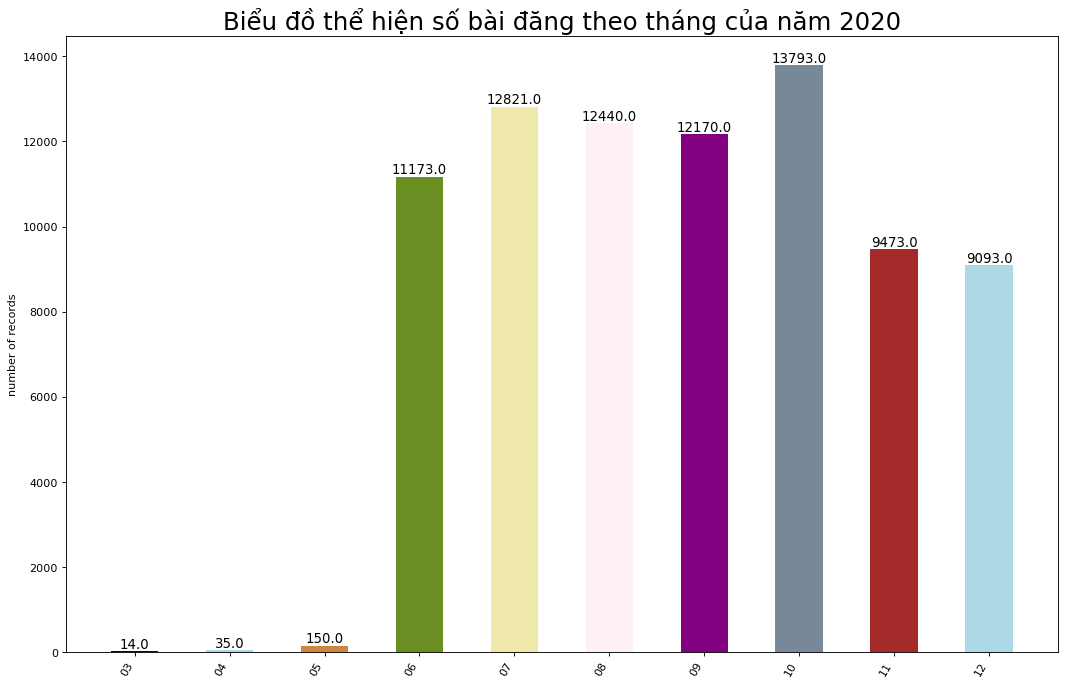

In [17]:
df1 = newdf.groupby('month').size().reset_index(name='number of records')
n = df1['month'].unique().__len__()+1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)

plt.figure(figsize=(16,10), dpi= 80)
plt.bar(df1['month'], df1['number of records'], color=c, width=.5)
for i, val in enumerate(df1['number of records'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

plt.gca().set_xticklabels(df1['month'], rotation=60, horizontalalignment= 'right')
plt.title("Biểu đồ thể hiện số bài đăng theo tháng của năm 2020", fontsize=22)
plt.ylabel('number of records')
plt.show()

* Biểu đồ thể hiện giá nhà đất trung bình theo tháng (VND/m2)

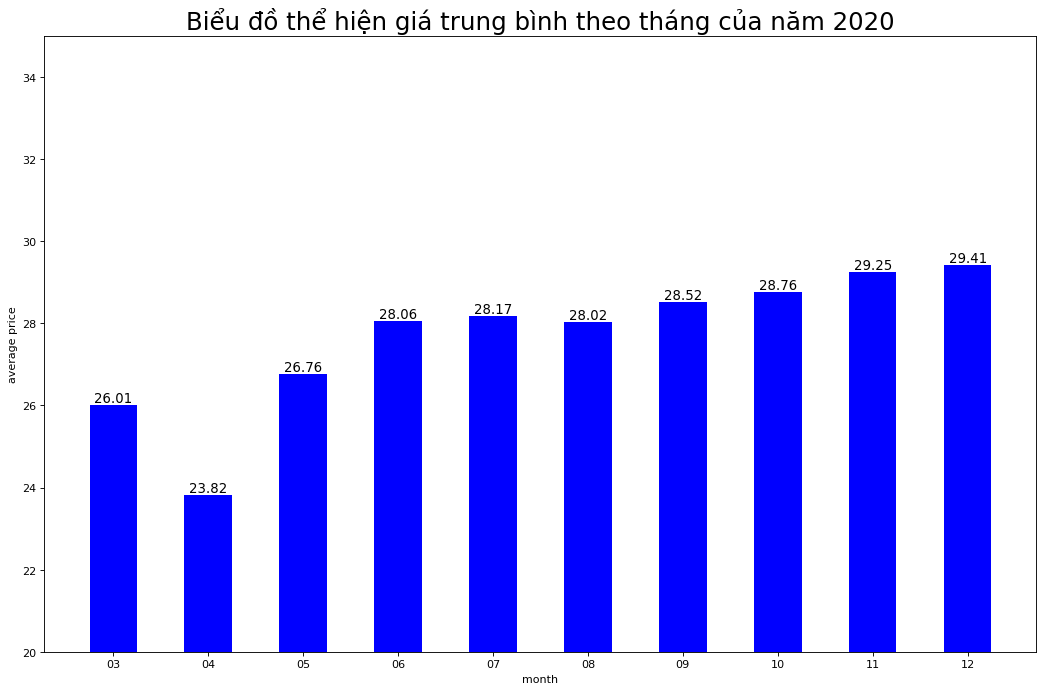

In [36]:
#Code ở đây
newdf['pps'] = newdf['price']/newdf['square']
df2 = newdf.groupby('month')['pps'].mean().reset_index(name = 'pps')
plt.figure(figsize=(16,10), dpi= 80)
plt.bar(df2['month'], df2['pps'], color='blue', width=.5)
for i, val in enumerate(df2['pps'].values):
    plt.text(i, val, round(val, 2), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

plt.xlabel('month')
plt.ylabel('average price')
plt.ylim(20, 35)
plt.title("Biểu đồ thể hiện giá trung bình theo tháng của năm 2020", fontsize=22)
plt.show()


* Biểu đồ mật độ giá nhà của tháng 4 và tháng 12 (VND/m2)

C:\Users\Admin\AppData\Local\Temp\ipykernel_39436\3038123801.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['pps'] = df3['price']/df3['square']
C:\Users\Admin\AppData\Local\Temp\ipykernel_39436\3038123801.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


<Figure size 1280x800 with 0 Axes>

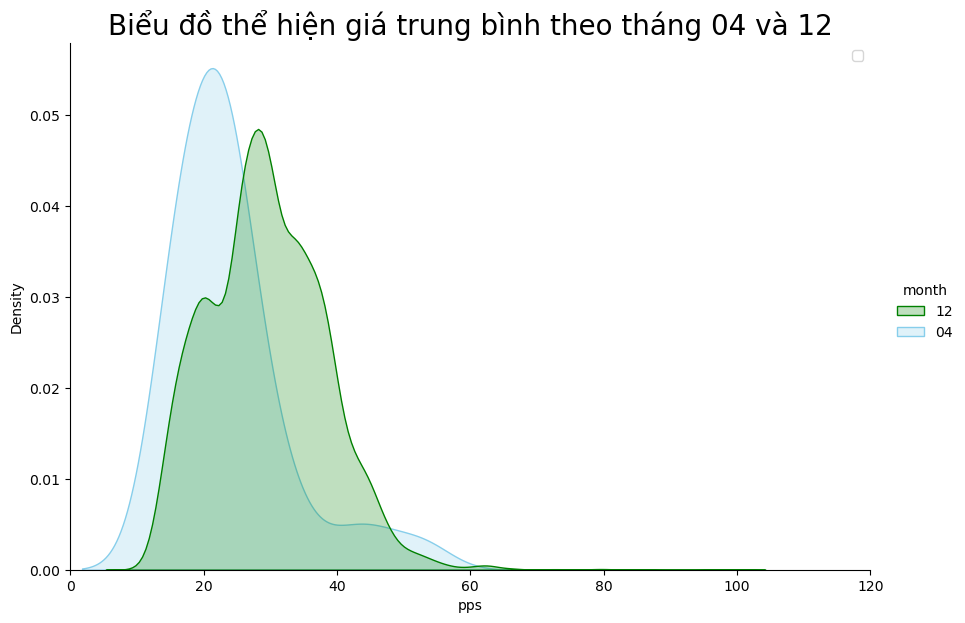

In [39]:
#Gọi ý: sns.displot()
df3 = newdf[(newdf['month'] == '04') | (newdf['month'] == '12')]
df3['pps'] = df3['price']/df3['square']
plt.figure(figsize=(16,10), dpi= 80)
sns.displot(
    data=df3,
    x='pps',
    hue='month',
    kind='kde',
    fill=True,
    common_norm=False,  
    height=6,
    aspect=1.5,
    palette={'04': 'skyblue', '12': 'green'}
)
plt.title("Biểu đồ thể hiện giá trung bình theo tháng 04 và 12", fontsize=20)
plt.xlim(0,120)
plt.legend()
plt.show()


* Số lượng bất động sản phân theo số lượng bedrooms

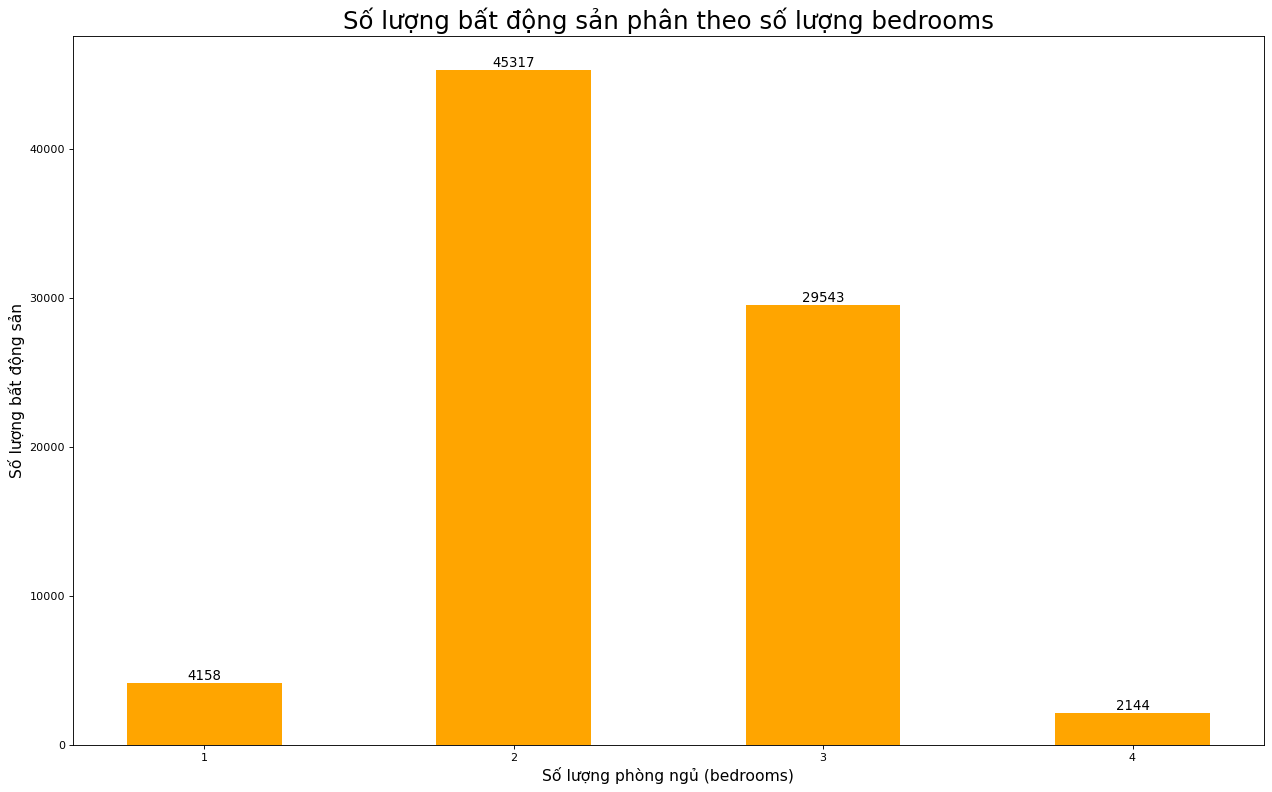

In [ ]:
#Code ở đây
df4 = newdf.groupby('bedrooms').size().reset_index(name='number of records')
plt.figure(figsize=(16,10), dpi= 80)
plt.bar(df4['bedrooms'], df4['number of records'], color='orange', width=.5)
for i, val in enumerate(df4['number of records'].values):
    plt.text(i+1, val, f"{int(val)}",
             ha='center', va='bottom',
             fontdict={'fontweight':500, 'size':12})
    
# for i, val in zip(df4['bedrooms'], df4['number of records']):
#     plt.text(i, val, f"{int(val)}",
#              ha='center', va='bottom',
#              fontdict={'fontweight':500, 'size':12})

plt.xticks(df4['bedrooms'])
plt.title("Số lượng bất động sản phân theo số lượng bedrooms", fontsize=22)
plt.xlabel("Số lượng phòng ngủ (bedrooms)", fontsize=14)
plt.ylabel("Số lượng bất động sản", fontsize=14)
plt.tight_layout()
plt.show()


* Giá bất động sản trung bình theo số lượng bedrooms

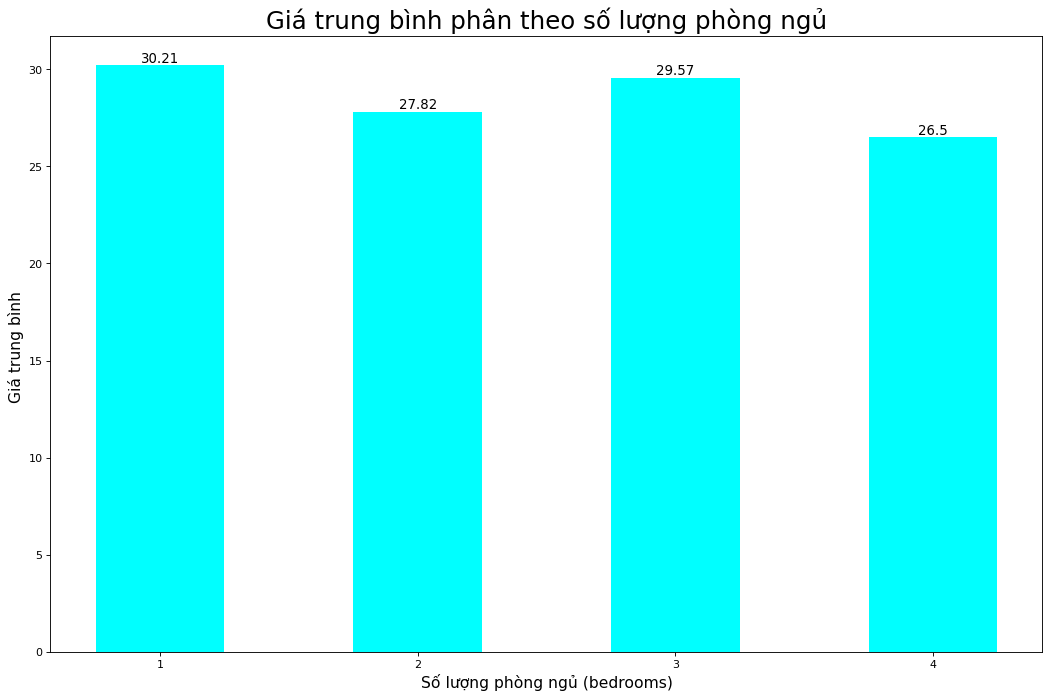

In [59]:
# Code ở đây
df5 = newdf.groupby('bedrooms')['pps'].mean().reset_index(name='avarage price')
plt.figure(figsize = (16,10), dpi= 80)
plt.bar(df5['bedrooms'], df5['avarage price'], color='cyan', width=.5)
for i, val in enumerate(df5['avarage price'].values):
    plt.text(i + 1, val, round(val, 2),
             ha='center', va='bottom',
             fontdict={'fontweight':500, 'size':12})
plt.xlabel("Số lượng phòng ngủ (bedrooms)", fontsize=14)
plt.ylabel("Giá trung bình ", fontsize=14)
plt.title("Giá trung bình phân theo số lượng phòng ngủ", fontsize=22)
plt.xticks(df5['bedrooms'])
plt.show()

* Giá nhà đất trung bình theo quận (VND/m2)

C:\Users\Admin\AppData\Local\Temp\ipykernel_39436\3713323053.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(df6['district'], rotation=45, horizontalalignment= 'right')


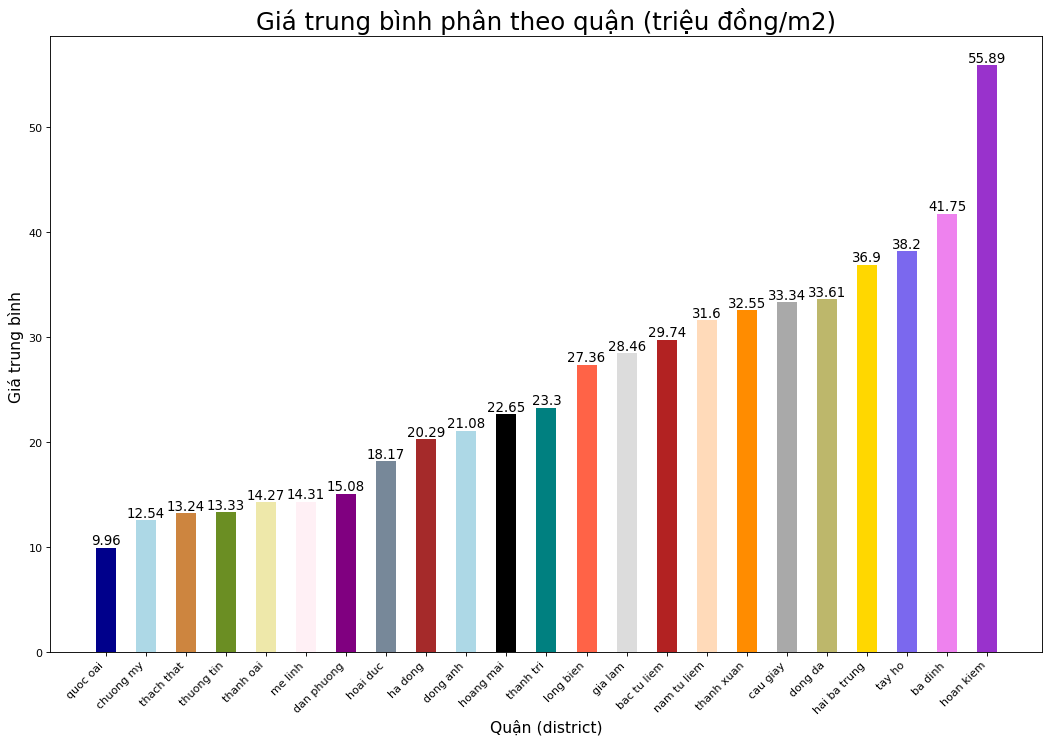

In [68]:
# Code ở đây
df6 = newdf.groupby('district')['pps'].mean().reset_index(name='avarage price')
df6 = df6.sort_values(by='avarage price')
n = df6['district'].unique().__len__()+1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)
plt.figure(figsize = (16,10), dpi= 80)
plt.bar(df6['district'], df6['avarage price'], color=c, width=.5)
for i, val in enumerate(df6['avarage price'].values):
    plt.text(i, val, round(val, 2),
             ha='center', va='bottom',
             fontdict={'fontweight':500, 'size':12})
plt.xlabel("Quận (district)", fontsize=14)
plt.ylabel("Giá trung bình ", fontsize=14)
plt.title("Giá trung bình phân theo quận (triệu đồng/m2)", fontsize=22)
#plt.xticks(df6['district'])
plt.gca().set_xticklabels(df6['district'], rotation=45, horizontalalignment= 'right')
plt.show()

* Giá nhà đất trung bình theo các phường quận Hoàn Kiếm (VND/m2)

C:\Users\Admin\AppData\Local\Temp\ipykernel_39436\1153753754.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(df7['ward'], rotation=45, horizontalalignment= 'right')


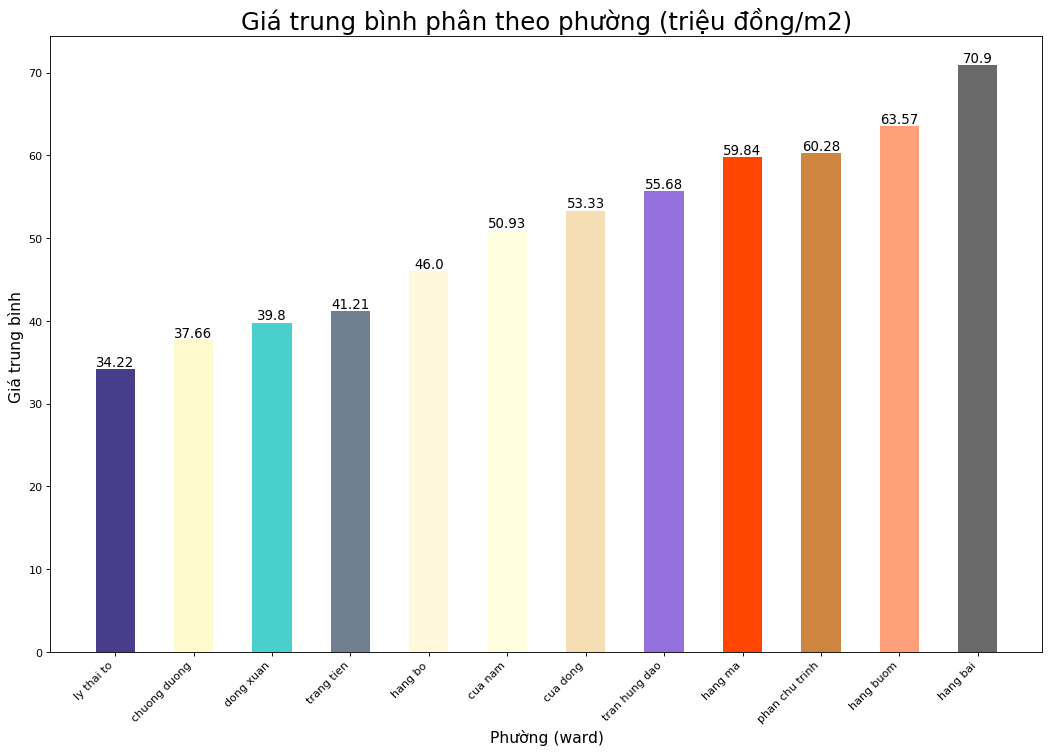

In [75]:
# Code ở đây
df7 = newdf[newdf['district'] == 'hoan kiem']
df7 = df7.groupby('ward')['pps'].mean().reset_index(name='avarage price')
df7 = df7.sort_values(by='avarage price')
n = df7['ward'].unique().__len__()+1
c = random.choices(all_colors, k=n)
plt.figure(figsize = (16,10), dpi= 80)
plt.bar(df7['ward'], df7['avarage price'], color=c, width=.5)
for i, val in enumerate(df7['avarage price'].values):
    plt.text(i, val, round(val, 2),
             ha='center', va='bottom',
             fontdict={'fontweight':500, 'size':12})
plt.xlabel("Phường (ward)", fontsize=14)
plt.ylabel("Giá trung bình ", fontsize=14)
plt.title("Giá trung bình phân theo phường (triệu đồng/m2)", fontsize=22)
plt.gca().set_xticklabels(df7['ward'], rotation=45, horizontalalignment= 'right')
plt.show()


* Giá nhà đất trung bình theo nhà đầu tư (VND/m2)

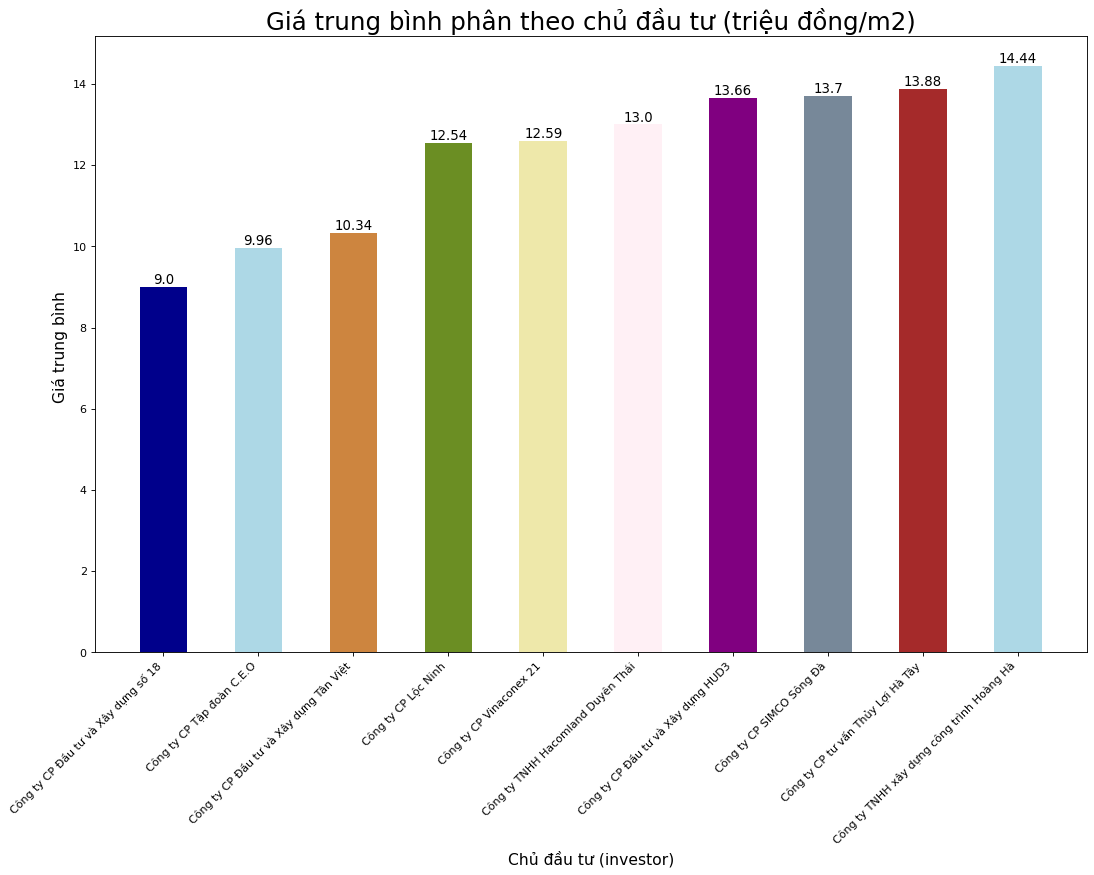

In [95]:
# Code ở đây
df8 = newdf.groupby('investor')['pps'].mean().reset_index(name='avarage price')
df8 = df8.sort_values(by='avarage price').head(10)
n = df8['investor'].unique().__len__()+1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)
plt.figure(figsize = (16,10), dpi= 80)
plt.bar(df8['investor'], df8['avarage price'], color=c, width=.5)
for i, val in enumerate(df8['avarage price'].values):
    plt.text(i, val, round(val, 2),
             ha='center', va='bottom',
             fontdict={'fontweight':500, 'size':12})
plt.xlabel("Chủ đầu tư (investor)", fontsize=14)
plt.ylabel("Giá trung bình ", fontsize=14)
plt.title("Giá trung bình phân theo chủ đầu tư (triệu đồng/m2)", fontsize=22)
plt.gca().set_xticks(range(len(df8['investor'])))
plt.gca().set_xticklabels(df8['investor'], rotation=45, horizontalalignment= 'right')

plt.show()

* Giá nhà đất trung bình theo dự án (VND/m2)

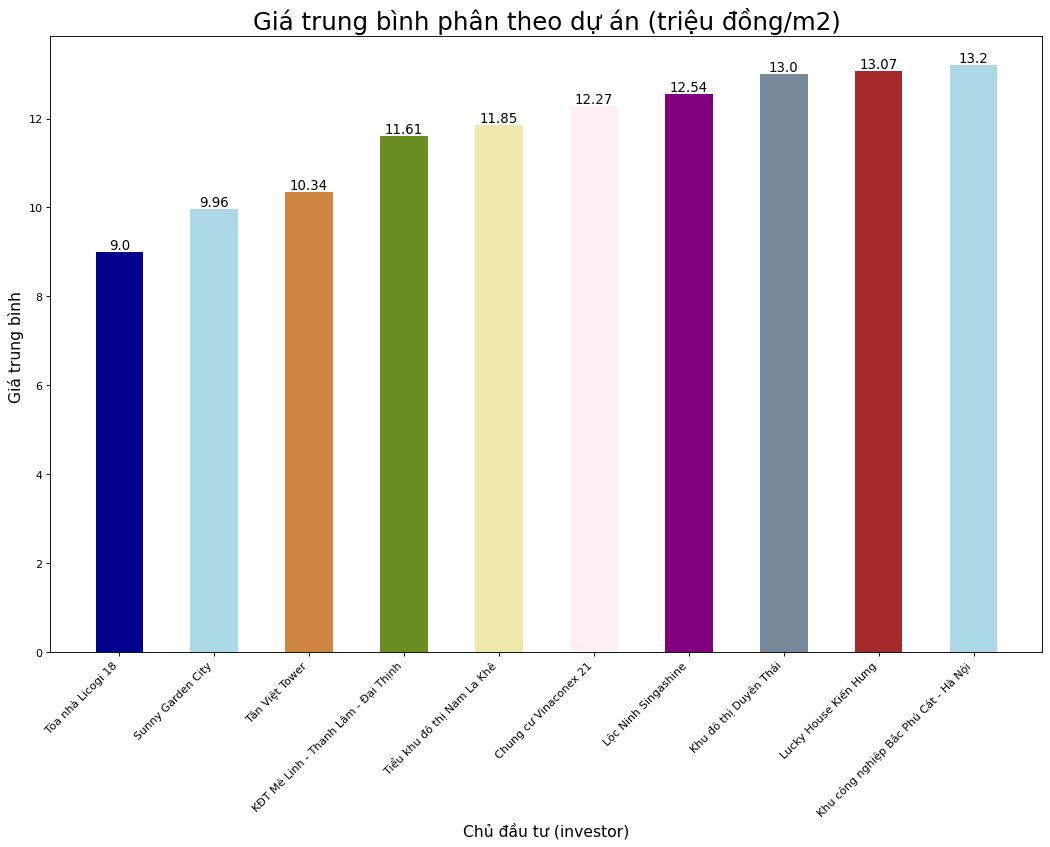

In [97]:
# Code ở đây
df9 = newdf.groupby('project')['pps'].mean().reset_index(name='avarage price')
df9 = df9.sort_values(by='avarage price').head(10)

n = df9['project'].unique().__len__()+1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)
plt.figure(figsize = (16,10), dpi= 80)
plt.bar(df9['project'], df9['avarage price'], color=c, width=.5)
for i, val in enumerate(df9['avarage price'].values):
    plt.text(i, val, round(val, 2),
             ha='center', va='bottom',
             fontdict={'fontweight':500, 'size':12})
plt.xlabel("Chủ đầu tư (investor)", fontsize=14)
plt.ylabel("Giá trung bình ", fontsize=14)
plt.title("Giá trung bình phân theo dự án (triệu đồng/m2)", fontsize=22)
plt.gca().set_xticks(range(len(df9['project'])))
plt.gca().set_xticklabels(df9['project'], rotation=45, horizontalalignment= 'right')

plt.show()

* Giá bất động sản phân bố theo top 10 nhà đầu tư triệu /m2

C:\Users\Admin\AppData\Local\Temp\ipykernel_39436\1358707363.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(df101['investor'], rotation=60, horizontalalignment= 'right')


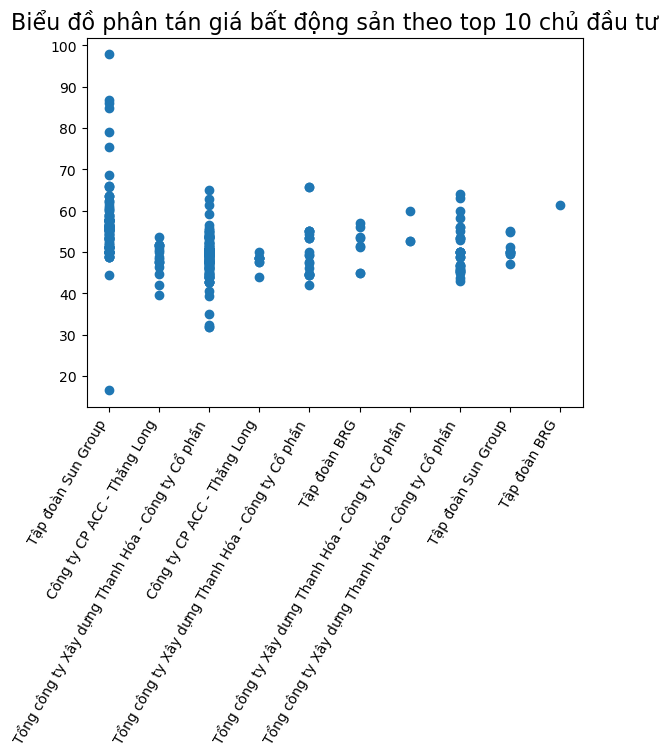

In [107]:
# Code ở đây
# Code ở đây
df10 = newdf[newdf['investor'].notnull()]
df10 = df10.groupby('investor')['pps'].mean().reset_index(name='avarage price')
df10 = df10.sort_values(by='avarage price', ascending=False).head(10)
topInvestors = df10['investor'].unique()
df101 = newdf.loc[newdf['investor'].isin(topInvestors)]
plt.scatter(df101.investor, df101.pps)
plt.gca().set_xticklabels(df101['investor'], rotation=60, horizontalalignment= 'right')
plt.title("Biểu đồ phân tán giá bất động sản theo top 10 chủ đầu tư", fontsize=16)
plt.show()


* Giá bất động sản phân bố theo dự án

C:\Users\Admin\AppData\Local\Temp\ipykernel_39436\2718676987.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(df11['project'], rotation = 60, horizontalalignment= 'right')


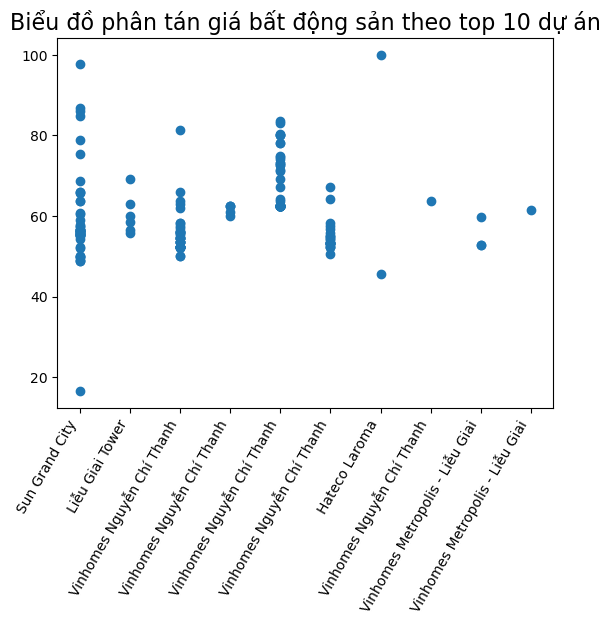

In [ ]:
# Code ở đây
proj = newdf[newdf['project'].notnull()]
proj = proj.groupby('project')['pps'].mean().reset_index(name='avarage price')
proj = proj.sort_values(by='avarage price', ascending=False).head(10)
topProjects = proj['project'].unique()
df11 = newdf.loc[newdf['project'].isin(topProjects)]
plt.scatter(df11.project, df11.pps)
plt.gca().set_xticklabels(df11['project'], rotation = 60, horizontalalignment= 'right')
plt.title("Biểu đồ phân tán giá bất động sản theo dự án", fontsize=16)
plt.show()

* Giá nhà đất trung bình theo hướng nhà (VND/m2)

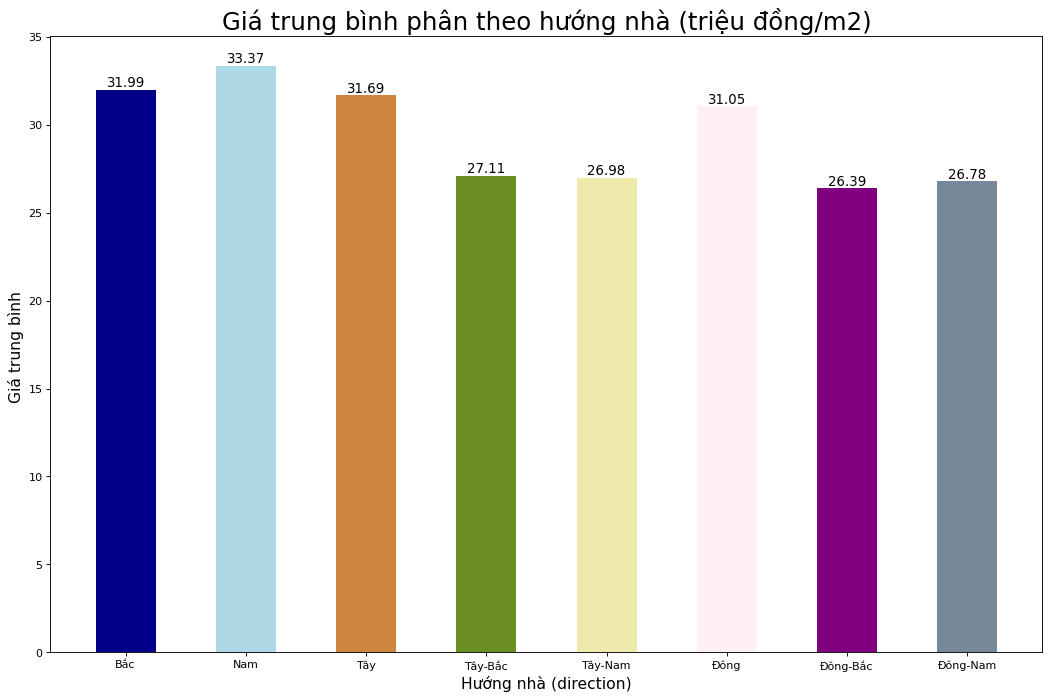

In [112]:
# Code ở đây
df13 = newdf.groupby('direction')['pps'].mean().reset_index(name='avarage price')
n = df13['direction'].unique().__len__()+1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)
plt.figure(figsize = (16,10), dpi= 80)
plt.bar(df13['direction'], df13['avarage price'], color=c, width=.5)
for i, val in enumerate(df13['avarage price'].values):
    plt.text(i, val, round(val, 2),
             ha='center', va='bottom',
             fontdict={'fontweight':500, 'size':12})
plt.xlabel("Hướng nhà (direction)", fontsize=14)
plt.ylabel("Giá trung bình ", fontsize=14)
plt.title("Giá trung bình phân theo hướng nhà (triệu đồng/m2)", fontsize=22)
plt.show()

In [ ]:
# Code ở đây

3. Tương quan giữa các trường thuộc tính

* https://vi.wikipedia.org/wiki/H%E1%BB%87_s%E1%BB%91_t%C6%B0%C6%A1ng_quan
* bieu do the hien he so tuong quan giua cac cap bien so thuc banggf biểu đồ heatmap

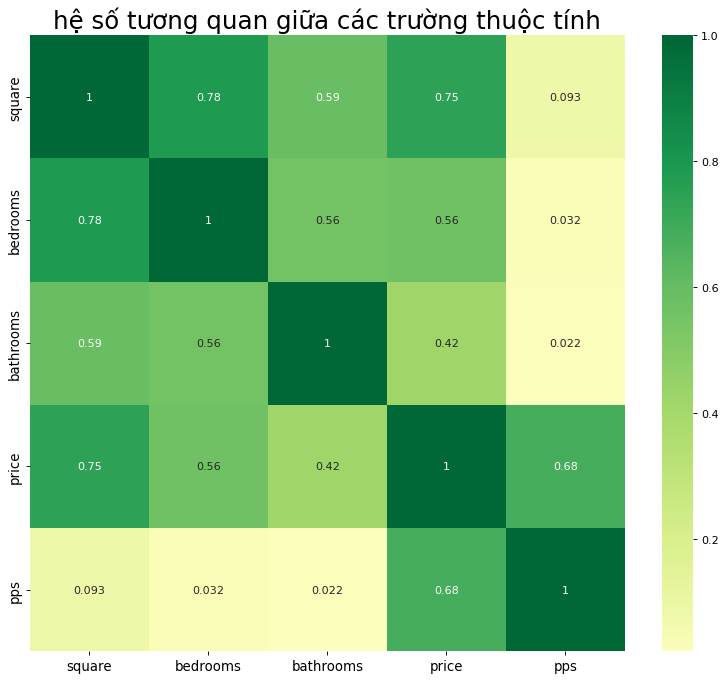

In [115]:
# Gợi ý: sns.heatmap(cmap='RdYlGn', ...)
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(newdf.corr(numeric_only=True), cmap='RdYlGn', center=0, annot=True)

plt.title('hệ số tương quan giữa các trường thuộc tính', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


* bieu do the hien moi quan he giua cac bien so thuc với biểu đồ phân tán

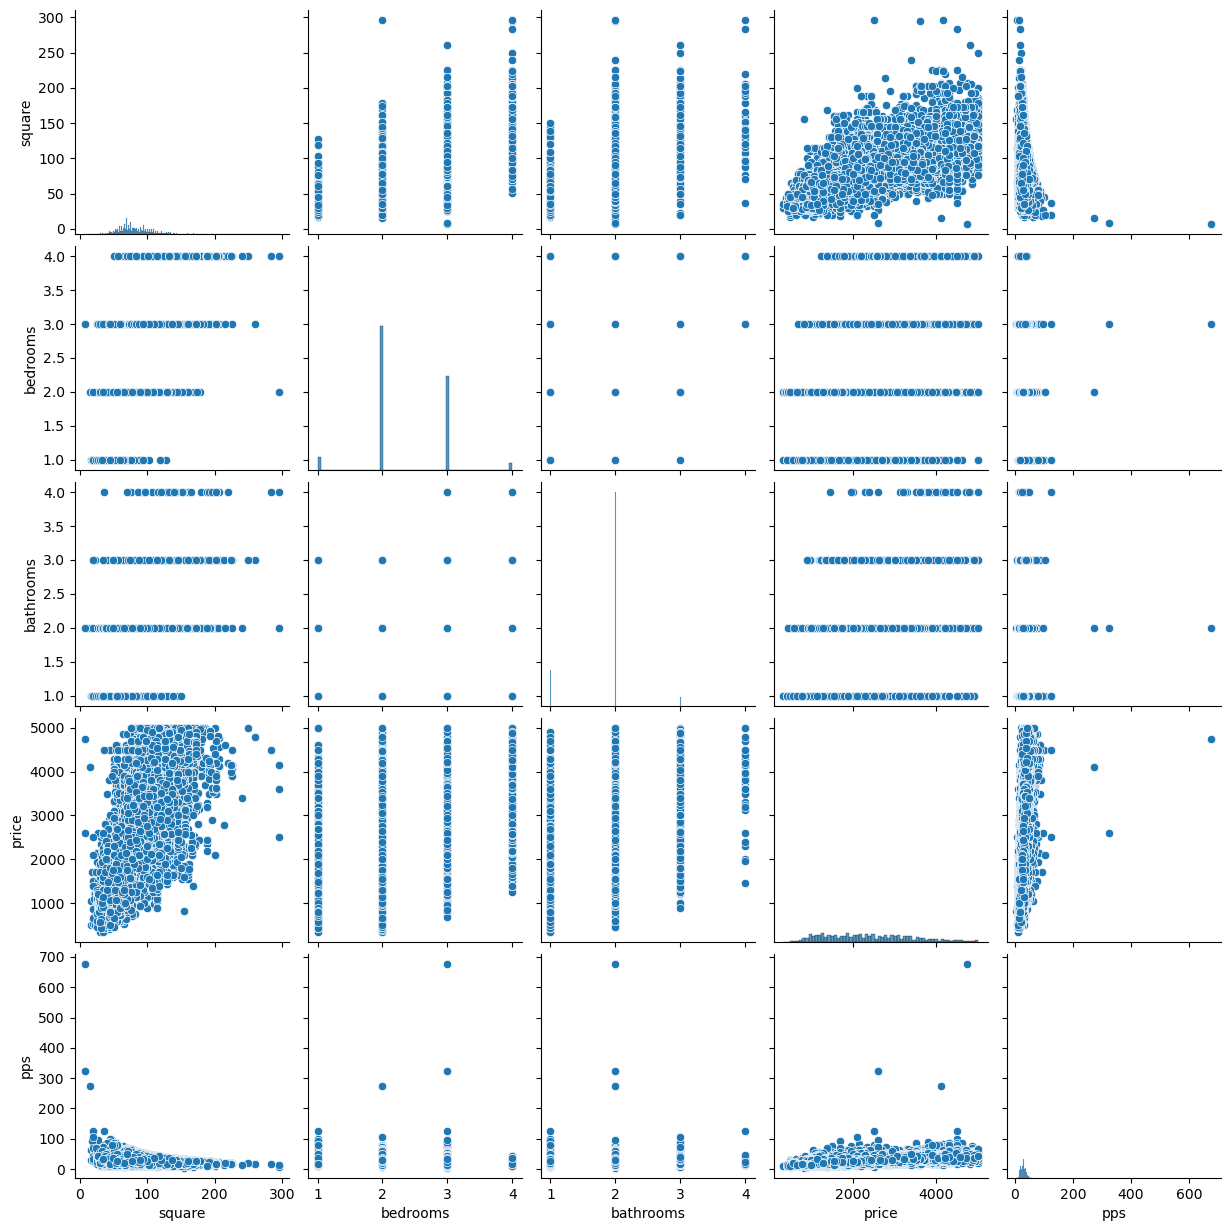

In [116]:
#Gợi ý: sns.pairplot(kind='scatter', ...)
sns.pairplot(newdf, kind='scatter')


4. Mật độ giá nhà trung bình theo quận 

C:\Users\Admin\AppData\Local\Temp\ipykernel_39436\3020574446.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(


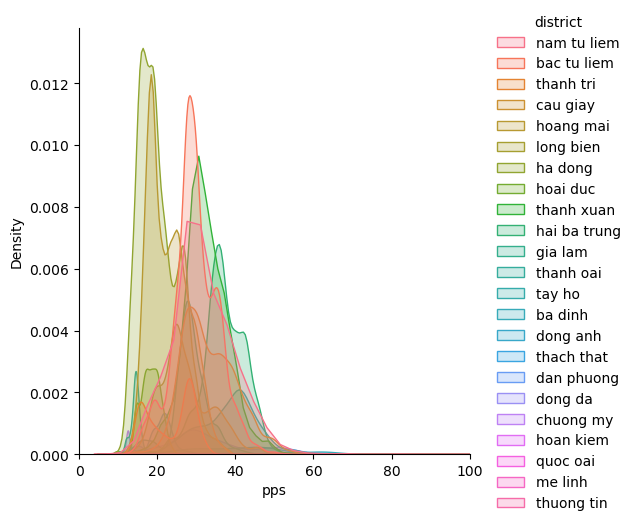

In [120]:
#Gợi ý: sns.displot()
sns.displot( 
    data=newdf,
    x='pps',
    hue='district',
    kind='kde',
    fill = True)
plt.xlim(0, 100)
plt.show()


End :))